# Assignment 1:

- Calculating Covariance, Correlation, and Handling Outliers
Task: Load a dataset, calculate the covariance and correlation between two fields, interpret the relationship, and handle any outliers.

# Solution
- Load Dataset: Let’s use a dataset, such as the "Iris" dataset from seaborn or your custom dataset.
- Calculate Covariance and Correlation.
Handle Outliers.

Covariance: -0.042434004474272924
Correlation: -0.11756978413300088
Outliers found:     sepal_length  sepal_width  petal_length  petal_width species
15           5.7          4.4           1.5          0.4  setosa


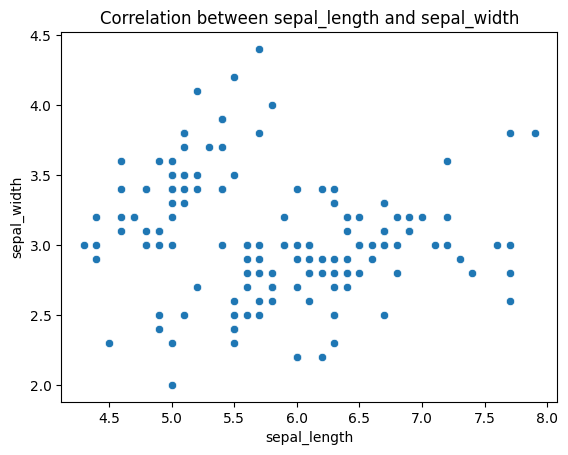

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = sns.load_dataset('iris')
# Select two numerical fields for analysis
field1, field2 = 'sepal_length', 'sepal_width'

# Calculate Covariance
covariance = data[[field1, field2]].cov().iloc[0, 1]
print("Covariance:", covariance)

# Calculate Correlation
correlation = data[[field1, field2]].corr().iloc[0, 1]
print("Correlation:", correlation)

# Outlier Detection (Using Z-score for simplicity)
z_scores = (data[[field1, field2]] - data[[field1, field2]].mean()) / data[[field1, field2]].std()
outliers = (np.abs(z_scores) > 3).any(axis=1)
print("Outliers found:", data[outliers])

# Visualization of Correlation
sns.scatterplot(x=field1, y=field2, data=data)
plt.title(f'Correlation between {field1} and {field2}')
plt.show()


# Assignment 2:

- Checking Normal Distribution
Task: Generate random numbers and check if they follow a normal distribution.

# Solution
- Generate Data: Use scipy.stats to generate random numbers.
- Check Normality: Plot a histogram and use a normality test.

Shapiro-Wilk Test: ShapiroResult(statistic=0.9977232217788696, pvalue=0.18512089550495148)


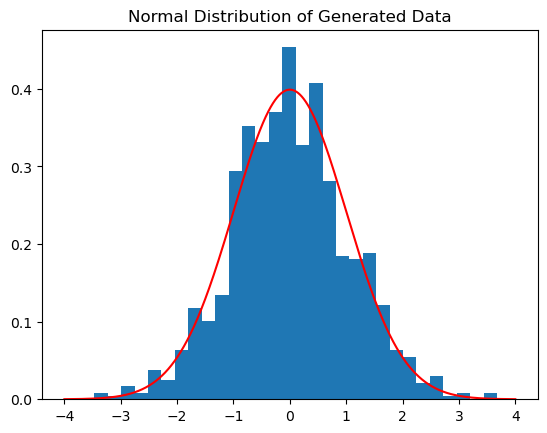

In [2]:
from scipy.stats import norm, shapiro
import matplotlib.pyplot as plt
import numpy as np
# Generate random numbers
data = norm.rvs(size=1000)

# Check if data is normally distributed
shapiro_test = shapiro(data)
print("Shapiro-Wilk Test:", shapiro_test)
# what is shapiro wilk test 
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
# The test statistic is W. The critical values depend on the sample size.
# The p-value is the probability that a value of W that extreme would be observed by chance.
# If the p-value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.

# Visualization
plt.hist(data, bins=30, density=True)
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x), color='red')
plt.title('Normal Distribution of Generated Data')
plt.show()


# Assignment 3:

- Predictive Modeling
  - Task: Explore predictive modeling techniques by creating and testing a model.

# Solution
- Load Dataset: We’ll use the "Iris" dataset and train a classifier.
- Predictive Modeling: Use a basic classifier (like Decision Tree).
- Test Model Performance: Use accuracy score for evaluation.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
# Load dataset
data = sns.load_dataset('iris')
X = data.drop(columns=['species'])
y = data['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


# Assignment 4: Monte Carlo Simulation
- Task: Use Monte Carlo simulation to analyze risk.

# Solution
- Generate Sample Data: Simulate a scenario with random values (e.g., investment returns).
- Monte Carlo Simulation: Calculate potential outcomes based on different risk factors.

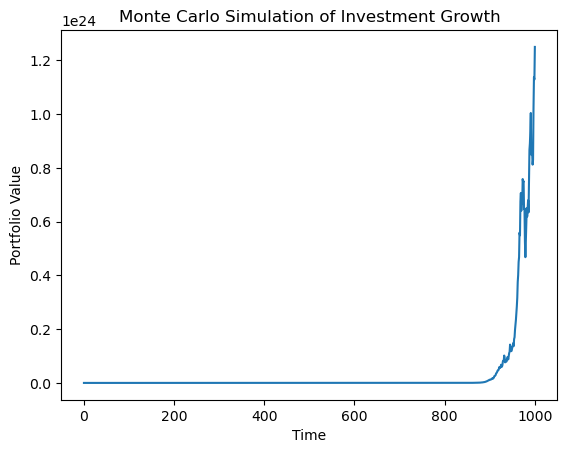

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate returns
np.random.seed(42)
returns = np.random.normal(0.05, 0.1, 1000)  # Assume 5% mean return with 10% std dev

# Simulate portfolio over time
initial_investment = 10000
portfolio = [initial_investment]
for r in returns:
    portfolio.append(portfolio[-1] * (1 + r))

# Visualization
plt.plot(portfolio)
plt.title("Monte Carlo Simulation of Investment Growth")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.show()


# Assignment 5: Factor Analysis
- Task: Perform factor analysis on a dataset and interpret the results.

# Solution
- Load Dataset: Use a suitable dataset like the "Wine Quality" dataset.
- Perform Factor Analysis: Extract factors using factor_analyzer.
- Interpret Factors: Visualize the factor loadings.

Factor Loadings:
               Factor 1  Factor 2
sepal_length  0.727461 -0.368746
sepal_width  -0.180852 -0.240590
petal_length  1.757902  0.035518
petal_width   0.731005  0.045266


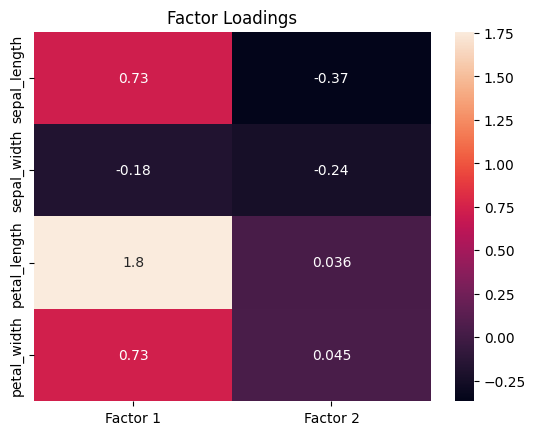

In [ ]:
from sklearn.decomposition import FactorAnalysis
import seaborn as sns
import pandas as pd

# Load dataset
data = sns.load_dataset("iris")  # Substitute with a suitable dataset
X = data.drop(columns=['species'])

# Perform Factor Analysis
fa = FactorAnalysis(n_components=2, random_state=42)
factors = fa.fit_transform(X)
factor_loadings = pd.DataFrame(fa.components_.T, columns=['Factor 1', 'Factor 2'], index=X.columns)
print("Factor Loadings:\n", factor_loadings)

# Visualization of Factor Loadings
sns.heatmap(factor_loadings, annot=True)
plt.title("Factor Loadings")
plt.show()
